In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import pylab as plt

import numpy as np

In [2]:
from colorterms import colorfits, filtersets as F, catalogs as C, spectools as S

In [3]:
catalogs = C.load_catalogs()

INFO: Loading the 'calspec' catalog
INFO: Loading the 'gunnstryker' catalog
INFO: Loading the 'pickles1998' catalog


In [4]:
filters = F.Filters(verbose=False)

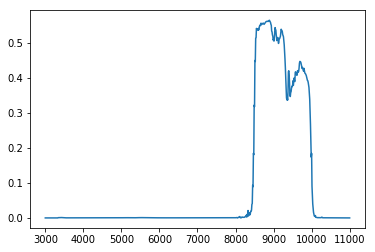

In [5]:
ff = filters.filters['decam']['z']
plt.plot(ff.lbda,ff.flux)

In [6]:
colt = colorfits.Colorterms(catalogs, filters)
colt.catalogs


{'calspec_bestofall': <colorterms.catalogs.Catalog at 0x109e15898>,
 'calspec_fosoke': <colorterms.catalogs.Catalog at 0x109db6f60>,
 'calspec_iueoke': <colorterms.catalogs.Catalog at 0x109dbae10>,
 'calspec_model': <colorterms.catalogs.Catalog at 0x1091fc5f8>,
 'calspec_stisnic': <colorterms.catalogs.Catalog at 0x109db6d30>,
 'gunnstryker': <colorterms.catalogs.Catalog at 0x109de50b8>,
 'pickles1998_UVILIB': <colorterms.catalogs.Catalog at 0x10b7097b8>,
 'pickles1998_UVKLIB': <colorterms.catalogs.Catalog at 0x10b709748>}

In [7]:
colt.filters.filters

{'decam': {'Y': <colorterms.spectools.Spectrum at 0x109e15748>,
  'g': <colorterms.spectools.Spectrum at 0x1097b94a8>,
  'i': <colorterms.spectools.Spectrum at 0x1097b9080>,
  'r': <colorterms.spectools.Spectrum at 0x109e15a20>,
  'u': <colorterms.spectools.Spectrum at 0x109e15be0>,
  'z': <colorterms.spectools.Spectrum at 0x109e15320>},
 'hsc': {'Y': <colorterms.spectools.Spectrum at 0x109e154a8>,
  'g': <colorterms.spectools.Spectrum at 0x109e15ba8>,
  'i': <colorterms.spectools.Spectrum at 0x109e15eb8>,
  'r': <colorterms.spectools.Spectrum at 0x109e15588>,
  'z': <colorterms.spectools.Spectrum at 0x109e15cf8>},
 'megacam': {'g': <colorterms.spectools.Spectrum at 0x109e20208>,
  'i': <colorterms.spectools.Spectrum at 0x1097b9048>,
  'r': <colorterms.spectools.Spectrum at 0x1097b9ef0>,
  'u': <colorterms.spectools.Spectrum at 0x1097b9518>,
  'z': <colorterms.spectools.Spectrum at 0x1097b9668>},
 'megacam2': {'g': <colorterms.spectools.Spectrum at 0x1097b9710>,
  'i2': <colorterms.spe

In [8]:
colt._compute_magnitudes('sdss','megacam', catalog_list=['calspec_bestofall'])

/Users/combet/anaconda3/lib/python3.6/site-packages/colorterms/spectools.py:105: RuntimeWarning: divide by zero encountered in log
  outmag = -2.5 / np.log(10) * np.log(photons)  # / refphotons)


In [9]:
colt.magnitudes.keys()

dict_keys(['calspec_bestofall'])

In [12]:
first_filterset = 'sdss'; second_filterset='megacam'

In [13]:
cuts = {'megacam(r) - sdss(r)': {'min': -0.10, 'max': 0},
        'sdss(u) - sdss(g)': {'max': 6.5},    
        'sdss(g) - sdss(r)': {'min': -1,'max': 2.8},
        'sdss(z) - sdss(i)': {'min': -1,'max': 3},
        'megacam(g) - sdss(g)': {'min': -0.9},
        'megacam(i) - sdss(i)': {'min': -0.8},
        'sdss(i) - sdss(r)': {'max': 1},
        'megacam(z) - sdss(z)': {'min': -1.35, 'max': -1.05}
       }

In [14]:
colt.catalogs

{'calspec_bestofall': <colorterms.catalogs.Catalog at 0x109e15898>,
 'calspec_fosoke': <colorterms.catalogs.Catalog at 0x109db6f60>,
 'calspec_iueoke': <colorterms.catalogs.Catalog at 0x109dbae10>,
 'calspec_model': <colorterms.catalogs.Catalog at 0x1091fc5f8>,
 'calspec_stisnic': <colorterms.catalogs.Catalog at 0x109db6d30>,
 'gunnstryker': <colorterms.catalogs.Catalog at 0x109de50b8>,
 'pickles1998_UVILIB': <colorterms.catalogs.Catalog at 0x10b7097b8>,
 'pickles1998_UVKLIB': <colorterms.catalogs.Catalog at 0x10b709748>}

INFO: Computing colorterms to go from sdss to megacam


/Users/combet/anaconda3/lib/python3.6/site-packages/colorterms/colorfits.py:105: RuntimeWarning: invalid value encountered in subtract
  for catalog in catalogs])


IndexError: index 3 is out of bounds for axis 0 with size 3

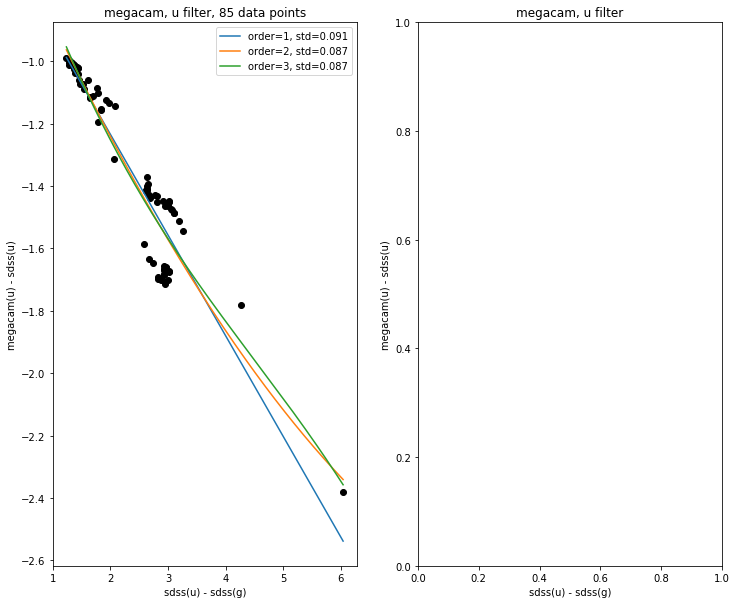

In [15]:
colt.compute_colorterms(first_filterset, second_filterset, cuts=cuts, sigma_clip=5,catalogs=['calspec_bestofall'])

In [22]:
catalogs=['calspec_bestofall']
print(np.transpose([colt._get_data(first_filterset, second_filterset, 'u', 'g-u', [catalog],\
                             cuts) for catalog in catalogs]))

KeyError: '-'

In [15]:
colt.results

{}

In [9]:
colt.filters.ordered

{'decam': array(['u', 'g', 'r', 'i', 'z', 'Y'], dtype='<U1'),
 'hsc': array(['g', 'r', 'i', 'z', 'Y'], dtype='<U1'),
 'megacam': array(['u', 'g', 'r', 'i', 'z'], dtype='<U1'),
 'megacam2': array(['u', 'g', 'r', 'i2', 'z'], dtype='<U2'),
 'megacam3': array(['u', 'g', 'r', 'i', 'z'], dtype='<U1'),
 'pan-starrs': array(['g', 'r', 'i', 'z', 'y'], dtype='<U1'),
 'sdss': array(['u', 'g', 'r', 'i', 'z'], dtype='<U1')}

In [10]:
colt.pairs

{'megacam': {'sdss': {'g': {'colors': [['g', 'u'], ['g', 'r']],
    'filter': 'g',
    'results': {'g,r': {1: {'noutliers': 10,
       'outliers': {'x': [1.7799586163909211,
         2.392292672771518,
         1.8366798300735425,
         2.467449866125591,
         1.1559163538276565,
         1.3396099763031657,
         2.439444407757314,
         1.1615412179104965,
         1.1615412179104965,
         2.1331632372465705],
        'y': [-0.6722173141995356,
         -0.7353670763663978,
         -0.6861317848325399,
         -0.7328023140670012,
         -0.6011679814244033,
         -0.6088082521082185,
         -0.7810015618481074,
         -0.6213531574298017,
         -0.6213531574298017,
         -0.7558907141942726]},
       'params': [-0.13344971310656809, -0.5219907723455882],
       'sigma_clip': 5,
       'ymodel': array([-0.46507419, -0.50512248, -0.52781913, -0.52727215, -0.49560954,
              -0.50528889, -0.51675324, -0.51759463, -0.48890371, -0.49102576,
      

In [11]:
colt.magnitudes['gunnstryker']

{'megacam': {'g': array([-38.67289197, -38.19812427, -38.629207  , -38.4634775 ,
         -38.16084739, -39.41407389, -39.2592052 , -39.71531471,
         -37.56678074, -38.01434541, -37.37303491, -38.19698157,
         -36.12456678, -39.02642606, -38.46201897, -36.93678351,
         -36.47017109, -38.73886466, -35.99975204, -37.72255548,
         -37.30594527, -37.24976303, -34.86153615, -38.67249105,
         -35.64824426, -34.98072595, -34.78096865, -34.66754034,
         -34.35005444, -34.22467233, -34.39804149, -33.46616264,
         -33.9982694 , -33.0539358 , -38.20087773, -34.5923054 ,
         -35.7488313 , -34.59427106, -32.53068253, -35.67018178,
         -35.02002281, -37.06335902, -35.27555757, -33.14721494,
         -34.35053119, -35.34722415, -34.95074687, -36.32869075,
         -35.09429853, -34.36957911, -35.4578858 , -33.84363594,
         -35.43514188, -35.4503766 , -33.19960653, -35.0177368 ,
         -34.16928561, -33.32601815, -32.97044778, -32.27339016,
         

TypeError: unhashable type: 'list'

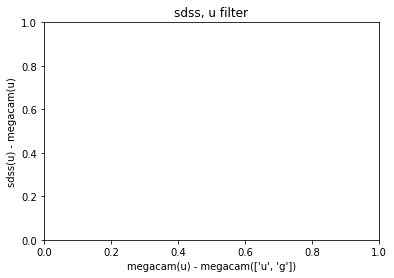

In [12]:
colt.plot_magdiff_vs_c(second_filterset, first_filterset)